In [1]:
import pandas as pd
#!pip install pycirclize
from pycirclize import Circos
from pycirclize.parser import Gff

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['text.usetex'] = False

Load annotation file and file with observed recombinations.

In [5]:
prokka_gff = Gff("./dCmr4_plasmid_prokka.gff")
captions_gff = Gff("./dCmr4_captions_pseudogff_light.gff")

Load lists of recombination coordinates

In [6]:
junctions_df1=pd.read_csv("CR11vsCR2_dCmr4_coords.csv")
junctions_df2=pd.read_csv("CR11vsCR5_dCmr4_coords.csv")
junctions_df1

read_name  repeat_begin1  repeat_end1  \
0     0035b2b8-1895-4b73-8123-ede531c21b55         106081       106116   
1     0086509e-2872-4a83-b07f-49fa649a5c06         106081       106116   
2     008ff284-c431-4cc5-a3c1-76c76da84423         106533       106568   
3     009760d2-44db-4dd7-b801-7e6b6fb9aeda         106764       106799   
4     00ac21ad-dd65-4867-b25e-a2e2f942f0c6         107296       107331   
...                                    ...            ...          ...   
2358  ff63e24a-577e-49df-9de8-4bd83e224be9         106005       106040   
2359  ff995d02-8255-45fd-adf0-dd16a4d46ca0         106081       106116   
2360  ff9c0c65-7978-43e8-96c3-e2f117474722         106533       106568   
2361  ffdfb62c-f493-414f-8572-4dba06817aec         106081       106116   
2362  ffe81b55-9f41-479f-8768-080790608423         106081       106116   

      repeat_begin2  repeat_end2  
0            117029       117064  
1            117330       117365  
2            117029       117064  
3            117330       117365  
4            116727       116762  
...             ...          ...  
2358         117403       117438  
2359         117403       117438  
2360         116877       116912  
2361         117029       117064  
2362         117029       117064  

[2363 rows x 5 columns]

Draw Circos plot for delta-cmr4

CRISPR extracted
CRISPR extracted
CRISPR extracted
CRISPR extracted
CRISPR extracted


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


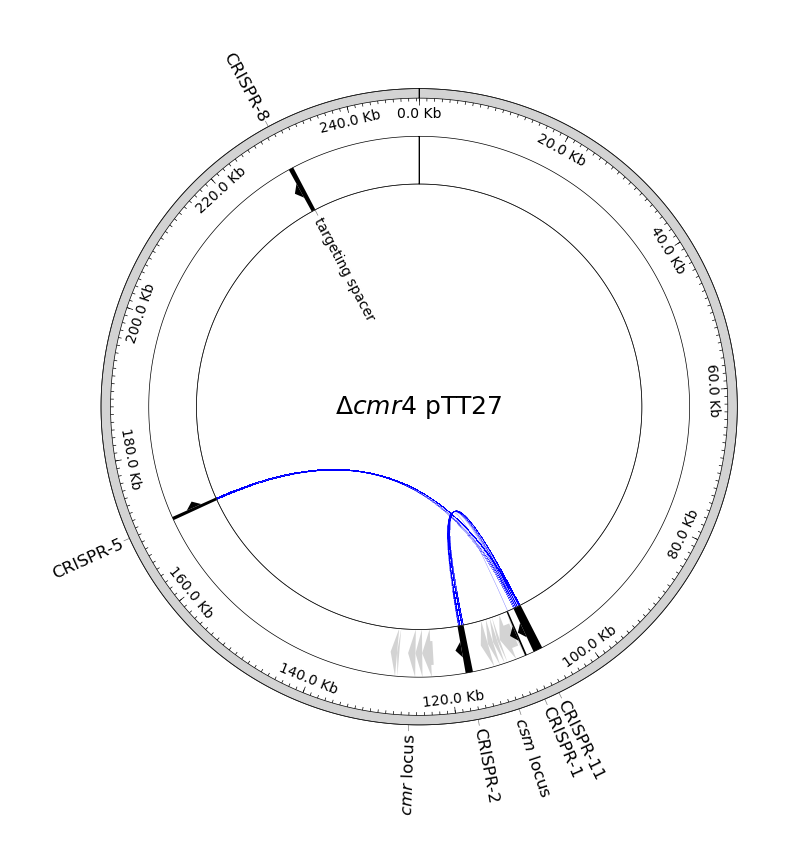

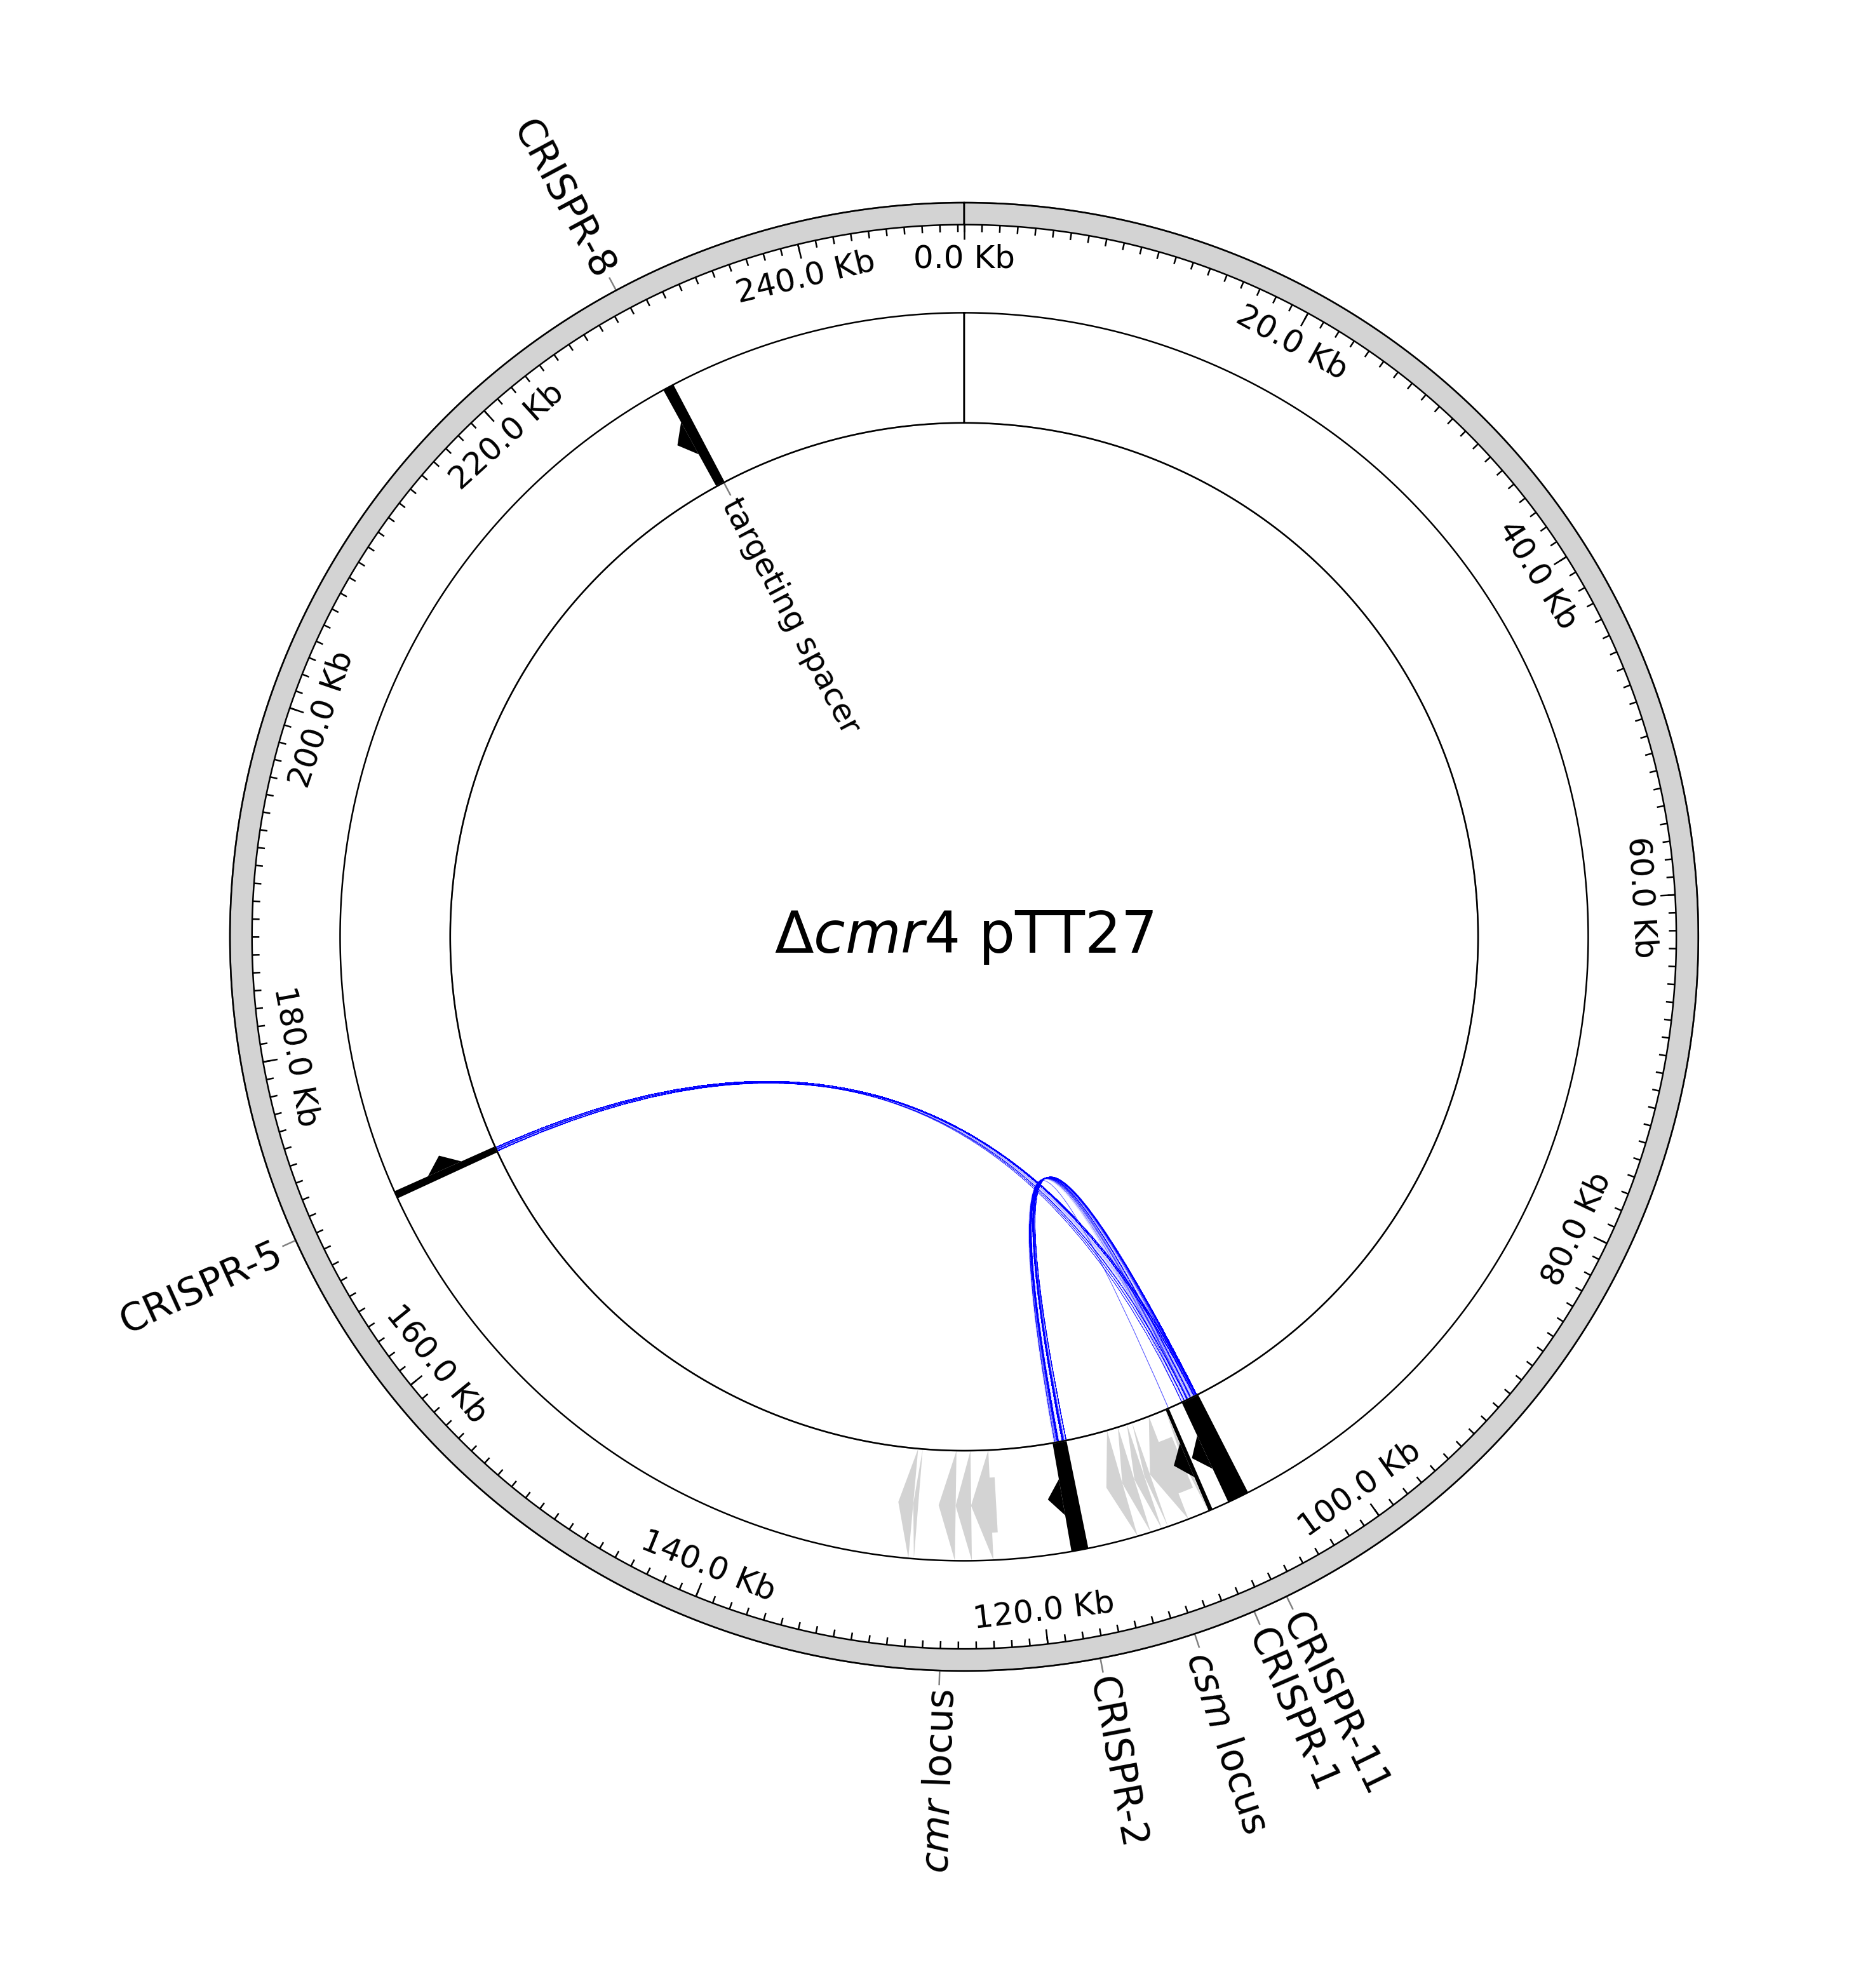

In [7]:
circos = Circos(sectors={prokka_gff.name: prokka_gff.range_size})
circos.text("$\Delta cmr4$ pTT27", size=18)

sector = circos.sectors[0]

# Plot outer track with xticks

major_ticks_interval = 20000
minor_ticks_interval = 1000
coord_track = sector.add_track((97, 100))
coord_track.axis(fc="lightgrey")
coord_track.xticks_by_interval(
    major_ticks_interval, outer=False, label_size=10, label_formatter=lambda v: f"{v/ 10 ** 3:.1f} Kb"
)
coord_track.xticks_by_interval(minor_ticks_interval, outer=False, tick_length=1, show_label=False)

#CRISPR operons

crispr_track = sector.add_track((70, 85))
crispr_track.axis()
crispr_track.genomic_features(
    captions_gff.extract_features("CDS"),
    plotstyle="arrow",
    r_lim=(70, 85),
    fc="lightgrey",
)

#CRISPR cassettes and arrows that show its orientation

crispr_track.genomic_features(
    captions_gff.extract_features("CRISPR"),
   # plotstyle="arrow",
    r_lim=(70, 85),
    fc="black",
)
crispr_track.genomic_features(
    captions_gff.extract_features("Arrow", target_strand=1),
    plotstyle="arrow",
    r_lim=(75, 80),
    fc="black",
)
crispr_track.genomic_features(
    captions_gff.extract_features("Arrow", target_strand=-1),
    plotstyle="arrow",
    r_lim=(75, 80),
    fc="black",
)

#draw links

for i in range(0, junctions_df1.shape[0]):
  region1 = ('dCmr4_plasmid_prokka', junctions_df1['repeat_begin1'].iloc[i], junctions_df1['repeat_end1'].iloc[i])
  region2 = ('dCmr4_plasmid_prokka', junctions_df1['repeat_begin2'].iloc[i], junctions_df1['repeat_end2'].iloc[i])
  circos.link(region1, region2, color='blue', alpha=0.01)

for i in range(0, junctions_df2.shape[0]):
  region1 = ('dCmr4_plasmid_prokka', junctions_df2['repeat_begin1'].iloc[i], junctions_df2['repeat_end1'].iloc[i])
  region2 = ('dCmr4_plasmid_prokka', junctions_df2['repeat_begin2'].iloc[i], junctions_df2['repeat_end2'].iloc[i])
  circos.link(region1, region2, color='blue', alpha=0.01)

#Artificially add links for cassette 1 recombinations.

region1 = ('dCmr4_plasmid_prokka', 108431, 108466)
region2 = ('dCmr4_plasmid_prokka', 116727, 116762)
circos.link(region1, region2, color='blue', alpha=0.5)

# Extract CDS product labels

pos_list, labels = [], []

for feat in captions_gff.extract_features("CRISPR"):
    print('CRISPR extracted')
    start, end = int(str(feat.location.end)), int(str(feat.location.start))
    pos = (start + end) / 2
    label = feat.qualifiers.get("Name", [""])[0]
    if label == "" or label.startswith("hypothetical"):
        continue
    if len(label) > 20:
        label = label[:20] + "..."
    pos_list.append(pos)
    labels.append(label)
    
# Plot CRISPR cassettes and operons labels on outer position

coord_track.xticks(
    pos_list,
    labels,
    label_orientation="vertical",
    show_bottom_line=True,
    label_size=12,
    line_kws=dict(ec="grey"),
)

#targeting spacer caption
crispr_track.xticks(
    [230042],
    ["targeting spacer"],
    outer=False,
    label_orientation="vertical",
    show_bottom_line=True,
    label_size=10,
    line_kws=dict(ec="grey"),
)

#operons caption
coord_track.xticks(
    [112000, 126000],
    ["$csm$ locus", "$cmr$ locus"],
    outer=True,
    label_orientation="vertical",
    show_bottom_line=True,
    label_size=12,
    line_kws=dict(ec="grey"),
)

fig = circos.plotfig()
circos.savefig('dcmr4_observed_recomb.png', dpi=360)

The same for another strain

In [21]:
prokka_gff = Gff("./dCsm3_plasmid_prokka.gff")
captions_gff = Gff("./dCsm3_captions_pseudogff_light.gff")
junctions_df1=pd.read_csv("CR2vsCR5_dCsm3_coords.csv")
junctions_df2=pd.read_csv("CR11vsCR5_dCsm3_coords.csv")

The same code for dcsm3 circos plot

CRISPR extracted
CRISPR extracted
CRISPR extracted
CRISPR extracted
CRISPR extracted


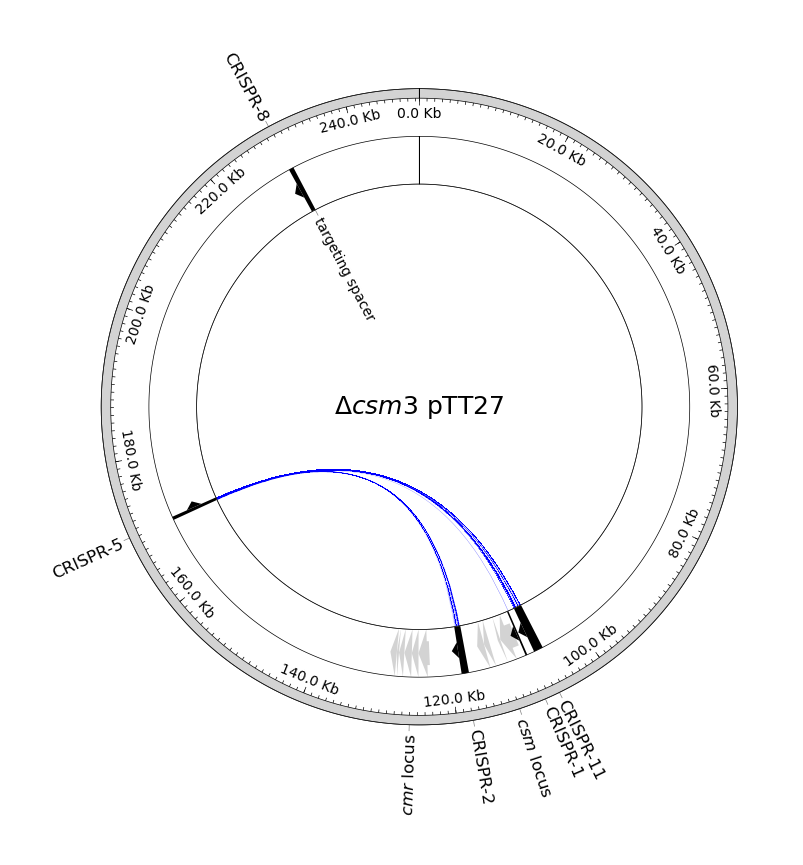

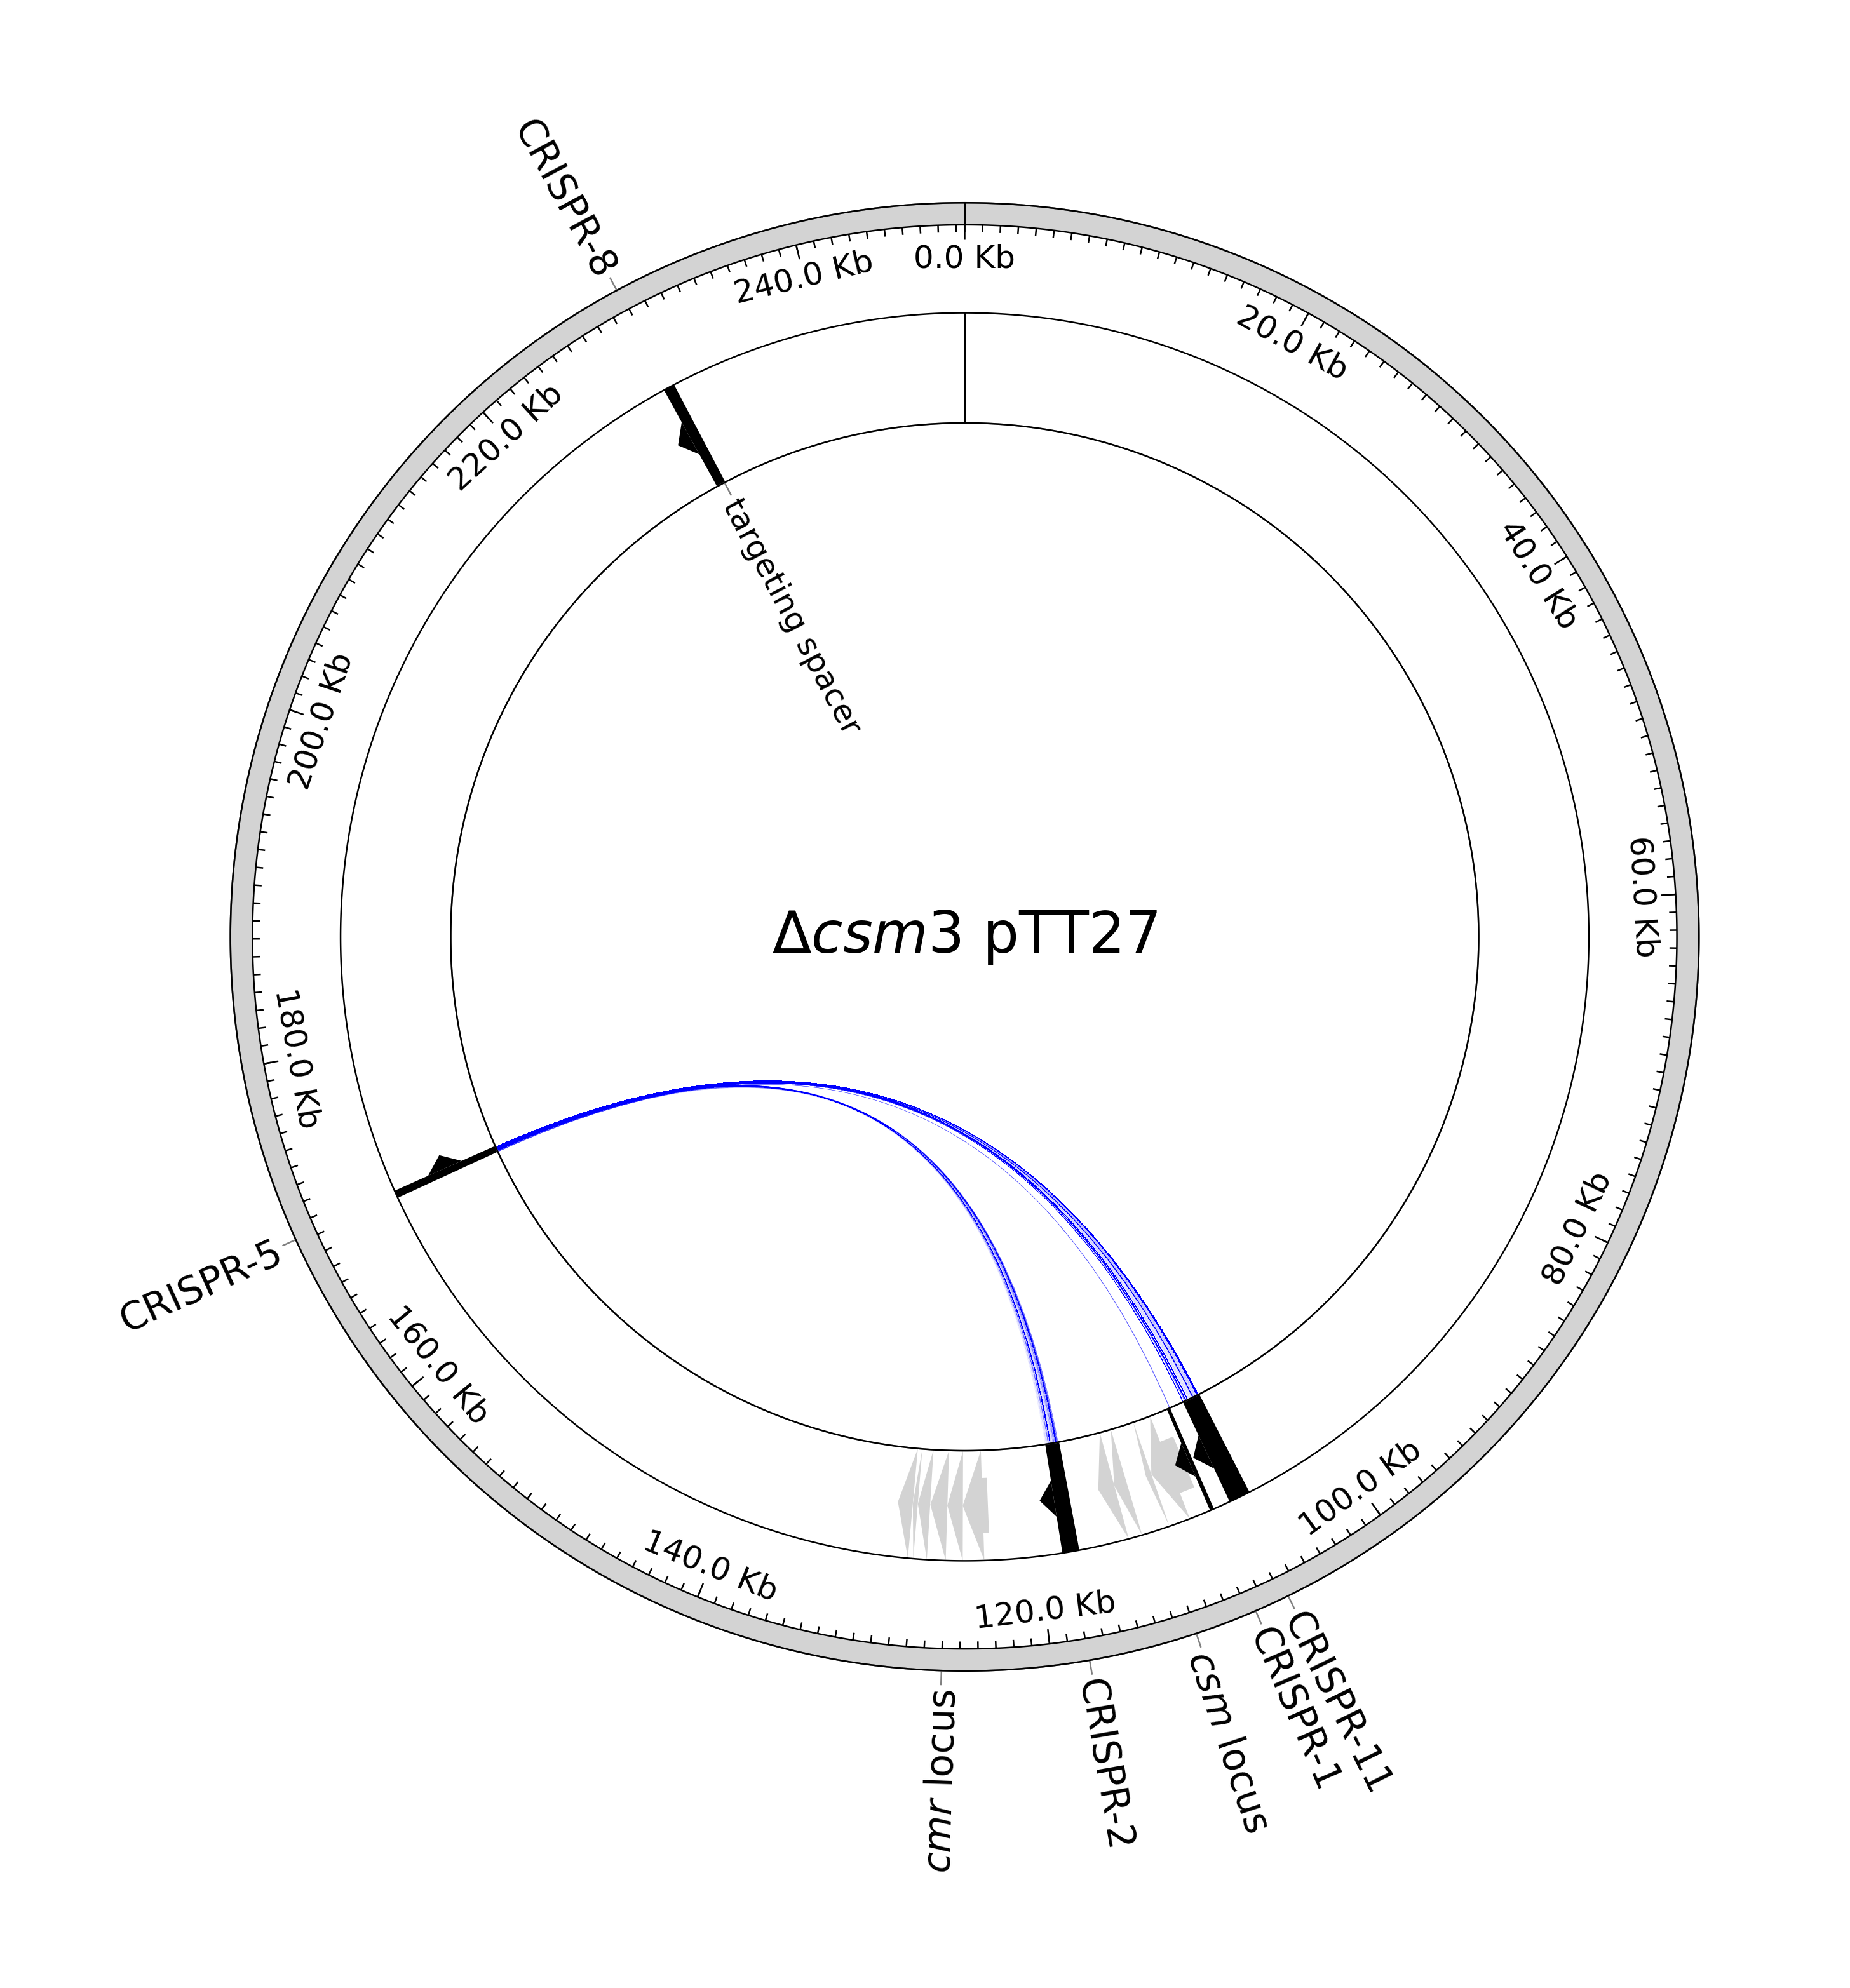

In [24]:
circos = Circos(sectors={prokka_gff.name: prokka_gff.range_size})
circos.text("$\Delta csm3$ pTT27", size=18)

sector = circos.sectors[0]

# Plot outer track with xticks

major_ticks_interval = 20000
minor_ticks_interval = 1000
coord_track = sector.add_track((97, 100))
coord_track.axis(fc="lightgrey")
coord_track.xticks_by_interval(
    major_ticks_interval, outer=False, label_size=10, label_formatter=lambda v: f"{v/ 10 ** 3:.1f} Kb"
)
coord_track.xticks_by_interval(minor_ticks_interval, outer=False, tick_length=1, show_label=False)

#CRISPR operons

crispr_track = sector.add_track((70, 85))
crispr_track.axis()
crispr_track.genomic_features(
    captions_gff.extract_features("CDS"),
    plotstyle="arrow",
    r_lim=(70, 85),
    fc="lightgrey",
)

#CRISPR cassettes and arrows that show its orientation

crispr_track.genomic_features(
    captions_gff.extract_features("CRISPR"),
   # plotstyle="arrow",
    r_lim=(70, 85),
    fc="black",
)
crispr_track.genomic_features(
    captions_gff.extract_features("Arrow", target_strand=1),
    plotstyle="arrow",
    r_lim=(75, 80),
    fc="black",
)
crispr_track.genomic_features(
    captions_gff.extract_features("Arrow", target_strand=-1),
    plotstyle="arrow",
    r_lim=(75, 80),
    fc="black",
)

for i in range(0, junctions_df1.shape[0]):
  region1 = ('dCsm3_plasmid_prokka', junctions_df1['repeat_begin1'].iloc[i], junctions_df1['repeat_end1'].iloc[i])
  region2 = ('dCsm3_plasmid_prokka', junctions_df1['repeat_begin2'].iloc[i], junctions_df1['repeat_end2'].iloc[i])
  circos.link(region1, region2, color='blue', alpha=0.01)

for i in range(0, junctions_df2.shape[0]):
  region1 = ('dCsm3_plasmid_prokka', junctions_df2['repeat_begin1'].iloc[i], junctions_df2['repeat_end1'].iloc[i])
  region2 = ('dCsm3_plasmid_prokka', junctions_df2['repeat_begin2'].iloc[i], junctions_df2['repeat_end2'].iloc[i])
  circos.link(region1, region2, color='blue', alpha=0.01)

#Add links for cassette 1 recombinations.

region1 = ('dCsm3_plasmid_prokka', 108431, 108466)
region2 = ('dCsm3_plasmid_prokka', 169984, 170019)
circos.link(region1, region2, color='blue', alpha=0.5)

# Extract CDS product labels

pos_list, labels = [], []

for feat in captions_gff.extract_features("CRISPR"):
    start, end = int(str(feat.location.end)), int(str(feat.location.start))
    pos = (start + end) / 2
    label = feat.qualifiers.get("Name", [""])[0]
    if label == "" or label.startswith("hypothetical"):
        continue
    if len(label) > 20:
        label = label[:20] + "..."
    pos_list.append(pos)
    labels.append(label)
    
# Plot CRISPR cassettes and operons labels on outer position

coord_track.xticks(
    pos_list,
    labels,
    label_orientation="vertical",
    show_bottom_line=True,
    label_size=12,
    line_kws=dict(ec="grey"),
)

#targeting spacer caption
crispr_track.xticks(
    [230177],
    ["targeting spacer"],
    outer=False,
    label_orientation="vertical",
    show_bottom_line=True,
    label_size=10,
    line_kws=dict(ec="grey"),
)

#operons caption
coord_track.xticks(
    [112000, 126000],
    ["$csm$ locus", "$cmr$ locus"],
    outer=True,
    label_orientation="vertical",
    show_bottom_line=True,
    label_size=12,
    line_kws=dict(ec="grey"),
)


fig = circos.plotfig()
circos.savefig('dcsm3_observed_recomb.png', dpi=360)